## Imports

In [9]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 

## Graphs

In [10]:
astro_g = nx.read_gml("graph_AstroPh.gml", label='id')
cond_g = nx.read_gml("graph_CondMat.gml", label='id')
celegans_g = nx.read_gml("graph_celegansInteractomes.gml", label='id')
chess_g = nx.read_gml("graph_chess.gml", label='id')
dolphins_g = nx.read_gml("graph_dolphins.gml", label='id')
airlines_g = nx.read_gml("graph_eu_airlines.gml", label='id')
fb_g = nx.read_gml("graph_facebook.gml", label='id')
fior_g = nx.read_gml("graph_florentine_families.gml", label='id')
game_g = nx.read_gml("graph_game_thrones.gml", label='id')
int_g = nx.read_gml("graph_internet.gml", label='id')
jazz_g = nx.read_gml("graph_jazz_collab.gml", label='id')
terr_g = nx.read_gml("graph_terrorists.gml", label='id')

graph_list = [
    astro_g,
    cond_g,
    celegans_g,
    chess_g,
    dolphins_g,
    airlines_g,
    fb_g,
    fior_g,
    game_g,
    int_g,
    jazz_g,
    terr_g
]

output_strings = [
    "AstroPhysics Arxiv collaborations",
    "Condensed Matter Arxiv collaborations",
    "C. elegans interactomes",
    "Kaggle chess players",
    "Dolphin social network",
    "European airline network",
    "Facebook friendships",
    "Florentine families",
    "Game of Thrones coappearances",
    "Internet AS graph",
    "Jazz collaboration network",
    "9-11 terrorist network"
]

str_n_graphs = list(zip(output_strings, graph_list))

graph_list_first = graph_list[:6]
str_n_graphs_first = str_n_graphs[:6]
graph_list_scnd = graph_list[6:]
str_n_graphs_scnd = str_n_graphs[6:]

##A02.1 Average degree of the nearest neighbours

###A.02.1.1 Degree of the nearest neighbours

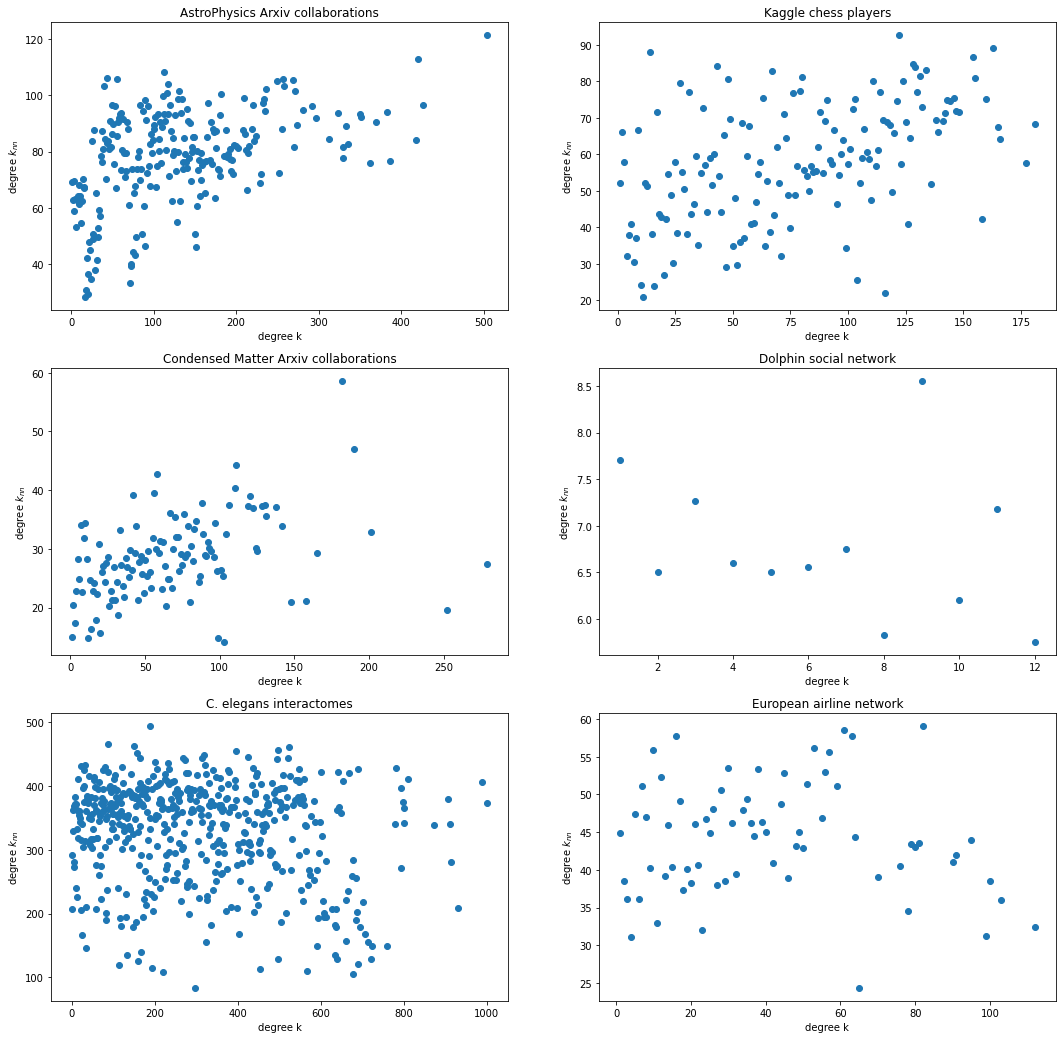

In [ ]:
x_values_per_graph = [np.unique([d for (n,d) in graph.degree()]) for graph in graph_list_first]
y_values_per_graph = [list(nx.average_degree_connectivity(graph).values()) for graph in graph_list_first]

fgsz = 18

figure, axis = plt.subplots(3, 2, figsize=(fgsz, fgsz))

a= len(x_values_per_graph[0])
b= len(y_values_per_graph[0])

for i in range(0, len(graph_list_first)):
  ax_x = i % 3
  ax_y = i // 3
  axis[ax_x, ax_y].scatter(x_values_per_graph[i], y_values_per_graph[i])
  axis[ax_x, ax_y].set_title(output_strings[i])
  axis[ax_x, ax_y].set_ylabel("degree $k_{nn}$")
  axis[ax_x, ax_y].set_xlabel("degree k")

###A02.1.2 Assortativity coefficient real network

In [ ]:
for gr_str, graph in str_n_graphs_first:
  print(f"{gr_str}, {nx.degree_pearson_correlation_coefficient(graph)}")

AstroPhysics Arxiv collaborations, 0.20131706127372812
Condensed Matter Arxiv collaborations, 0.12528250398544807
C. elegans interactomes, 0.15169796960231355
Kaggle chess players, 0.3705153782729761
Dolphin social network, -0.04359402821531298
European airline network, -0.15180413274193771


###A02.1.3 Assortativity coefficient randomised network

In [ ]:
for gr_str, graph in str_n_graphs_first:
  graph = nx.algorithms.smallworld.random_reference(graph, niter = 20, connectivity=False)
  print(f"{gr_str}, {nx.degree_pearson_correlation_coefficient(graph)}")

AstroPhysics Arxiv collaborations, -0.011681389811007744
Condensed Matter Arxiv collaborations, -0.0027806354900629777
C. elegans interactomes, -0.17728200960655444
Kaggle chess players, -0.010438593839114206
Dolphin social network, -0.056660731406656645
European airline network, -0.21016283781990547


##A02.2 Clustering and randomisation

###A02.2.1 Degree distribution

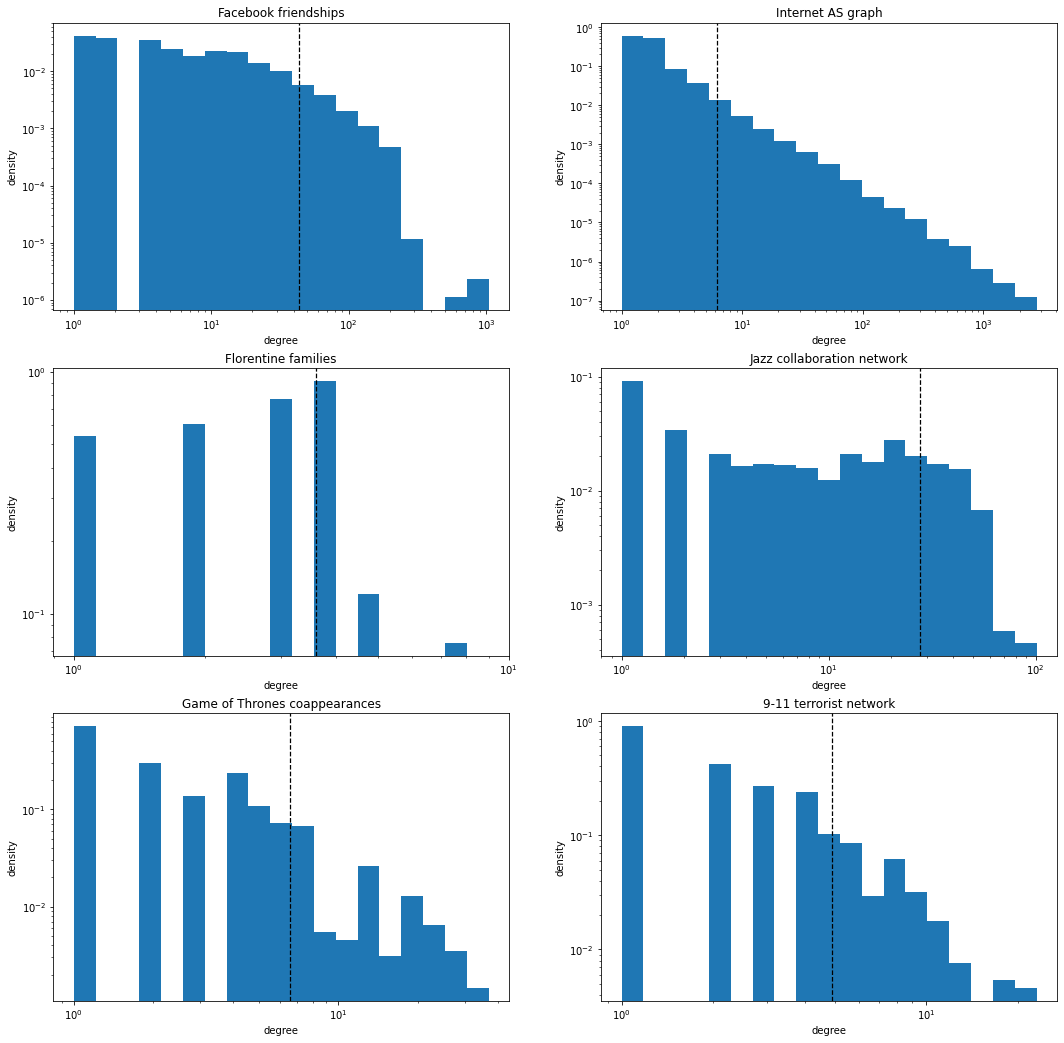

In [21]:
figure, axis = plt.subplots(3, 2, figsize=(fgsz, fgsz))

for i, (gr_str, graph) in enumerate(str_n_graphs_scnd):
  ax_x = i % 3
  ax_y = i // 3

  degs = [d for n, d in graph.degree()]
  my_bins = np.logspace(np.log10(min(degs)),np.log10(max(degs) +1), 20) 

  axis[ax_x, ax_y].hist(degs,bins=my_bins, density=True)
  axis[ax_x, ax_y].axvline(x=np.mean(degs), color='k', linestyle='dashed', linewidth=1.25)
  axis[ax_x, ax_y].set_yscale("log")
  axis[ax_x, ax_y].set_xscale("log")
  axis[ax_x, ax_y].set_title(gr_str)
  axis[ax_x, ax_y].set_ylabel("density")
  axis[ax_x, ax_y].set_xlabel("degree")

###A02.2.2 Clustering coefficient

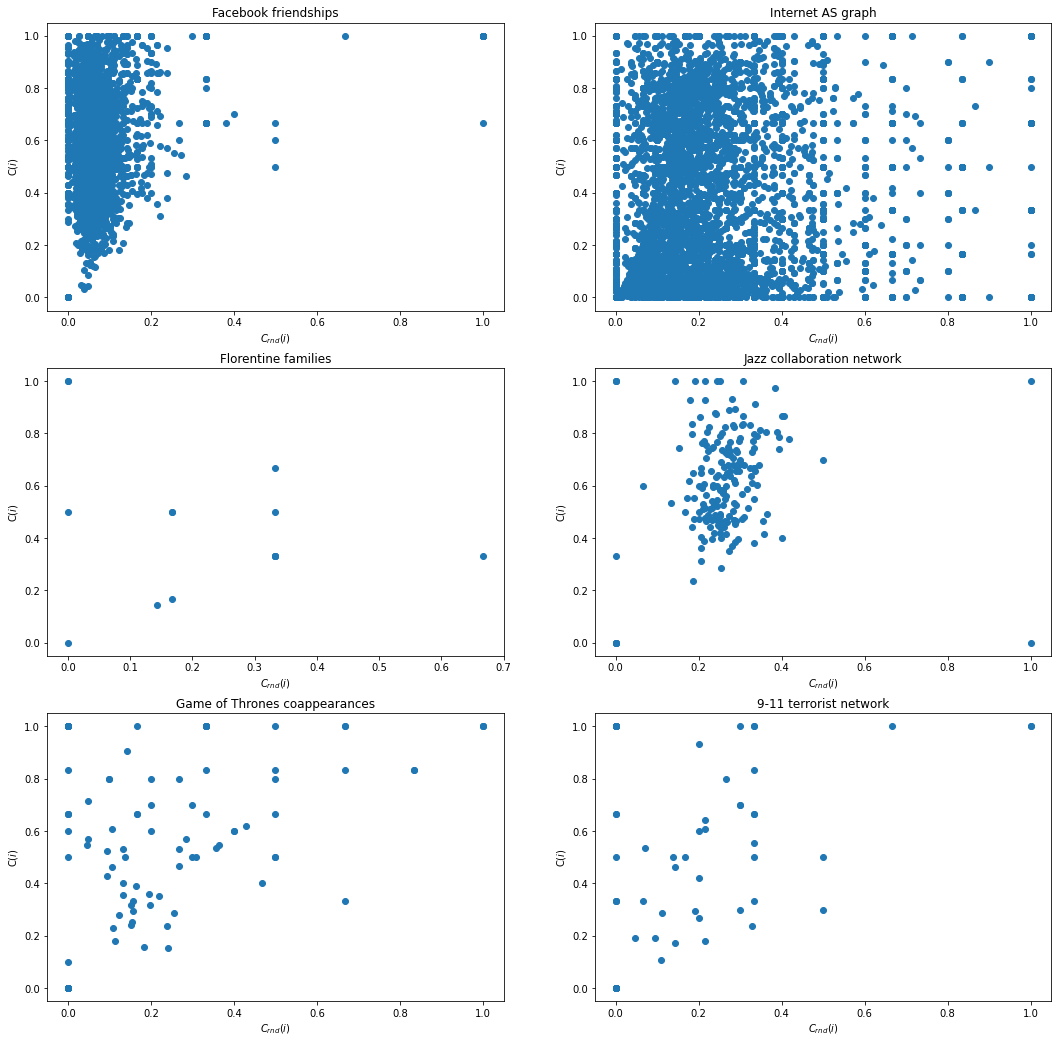

In [26]:
fgsz = 18

figure, axis = plt.subplots(3, 2, figsize=(fgsz, fgsz))

for i, (gr_str, graph) in enumerate(str_n_graphs_scnd):
  ax_x = i % 3
  ax_y = i // 3

  y = nx.clustering(graph).values()
  graph = nx.algorithms.smallworld.random_reference(graph, niter = 20, connectivity=False)
  x = nx.clustering(graph).values()

  axis[ax_x, ax_y].scatter(x, y)
  axis[ax_x, ax_y].set_title(gr_str)
  axis[ax_x, ax_y].set_ylabel("C($i$)")
  axis[ax_x, ax_y].set_xlabel("$C_{rnd}(i)$")